[Accueil](../../index.ipynb) > [Sommaire Première](../index.ipynb)

# TP titanic

Ce TP est une application pratique du cours sur l'[algorithme des plus proches voisins](../8_Algorithmique/3_k_plus_proches_voisins.ipynb)

## Récupération et observations des données.

Dans ce TP nous allons utiliser comme données le fichier titanic_train.csv (entrainement) et titanic_test.csv qui se trouvent dans ce TP.

<div class="alert alert-info">En utilisant la librairie pandas, écrire les fonctions <i>get_titanic_training_datas</i> et <i>get_titanic_test_datas</i> qui récupèrent respectivement les données d'entrainement et les données de tests depuis les fichiers titanic_train.csv et titanic_test.csv et retournent chacune un dataframe de type pandas.</div>

### Signification des variables

In [81]:
import pandas as pd

def get_titanic_training_datas():
    return pd.read_csv('titanic_train.csv')

def get_titanic_test_datas():
    return pd.read_csv('titanic_test.csv')

training_datas = get_training_titanic_datas()
test_datas = get_titanic_test_datas()

# Affichage des premières données
training_datas.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
training_datas.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Voici l'explication de la signification de chacune des colonnes : 

- PassengerId: unique ID du passager
- Survived: 0 = Non, 1 = Oui
- Pclass: passenger class 1 = 1ère, 2 = 2nde, 3 = 3ème
- Name: nom du passager
- Sex: Sexe du passager
- Age: Age du passager
- SibSp: Nombre de frères et soeurs ou epouse/mari dans le bateau
- Parch: Nombre de parents ou d'enfants dans le bateau.
- Ticket: Ticket ID
- Fare: Le prix du ticket
- Cabin: Numéro de cabine
- Embarked: Port d'embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)


Servez vous de la fonction info() pour afficher des informations sur les colonnes des données.

### Volumétrie des données.

Utiliser l'**attribut** *shape* pour afficher la 'forme' (volumétrie) de chacune des données (entrainement + test).

In [83]:
# Volumétrie les données
training_datas.shape


(891, 12)

### Informations supplémentaires
Quelles sont les informations fournies par la **méthode** *info* ?

In [84]:
# Informations supplémentaires
training_datas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Données manquantes

Nous venons de voir précédemmentque certaines données sont manquantes.
Grace aux méthodes isnull et sum, sommons les données manquantes pour chaque jeux de données

In [85]:
training_datas.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Préparation des données

- Selon vous, quelles sont les variables qui n'ont pas d'incidence sur le taux de survie ?
- Au contraire, quelles sont celles qui sont pertinentes?
- Classer ces variables selon:
  - Le physique de la personne
  - Le statut social
  - Le statut familial
  - Le lieu d'embarquement
  
Le but ici est de limiter le nombre de variables afin de simplifier le problème.  
  
- Que faire avec les données manquantes ?

### Présence de membre(s) de la famille à bord

Afin de simplifier les données, nous allons uniquement prendre en compte la présence, ou non, d'un membre de la famille à bord.
Nous allons ajouter une nouvelle colonne 'HasFamily' qui vaut 0 si la personne est seule et 1 sinon.

In [94]:
training_datas['NbMemberFamily'] = training_datas['SibSp'] + training_datas['Parch']
# On initialise à 0
training_datas['HasFamily'] = 0
# On passe à 1 ceux qui ont 1 ou plus d'un membre de leur famille à bord
training_datas.loc[training_datas['NbMemberFamily'] >= 1, 'HasFamily'] = 1

Nous allons utiliser la librairie *[seaborn](https://seaborn.pydata.org/)* pour observer les correlations entre les variables et le taux de survie.

Vérifions graphiquement si avoir un membre de sa famille à bord a un impact sur le taux de survie.

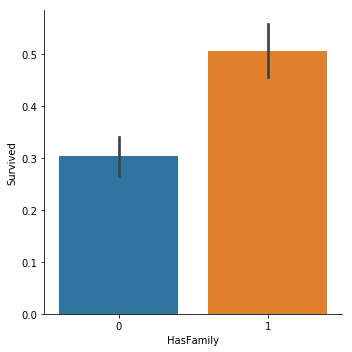

In [92]:
import seaborn
plot = seaborn.catplot(x="HasFamily", y="Survived", kind="bar", data=training_datas)

### Le problème de l'âge

Nous avons constaté qu'il manque des données sur l'age des passagers (NaN)
Comment traiter ces données manquantes ?
Que proposez vous ?


In [103]:
# On remplace les ages inconnus par l'âge médian...
training_datas["Age"] = training_datas["Age"].fillna(training_datas["Age"].median())
# On initialise AgeCat à 0
training_datas["AgeCat"] = 0
# Ceux qui ont plus de 18 ans à 1
training_datas.loc[training_datas['Age'] >= 18, 'AgeCat'] = 1

<div class="alert alert-info">Créer un graphique afin d'observer si la categorie de l'âge est relié au taux de survie.</div>

Une solution plus fine consiste à remplacer l'age manquant par l'age moyen selon la classe du ticket. Les résultats montre une disparité dans l'âge.

In [110]:
# calculate average age by passenger class to fill empty age cells
print('Age breakdown by passenger class: ')
print(training_datas.groupby('Pclass').mean()[['Age']])

# Fill empty values in age column
training_datas['Age'].fillna(training_datas['Age'].median(), inplace=True)
training_datas['Age'].fillna(training_datas['Age'].median(), inplace=True)


Age breakdown by passenger class: 
              Age
Pclass           
1       36.812130
2       29.765380
3       25.932627


### Sexe de la personne

<div class="alert alert-info">Vérifier graphiquement si le sexe de la personne influence le taux de survie.</div>

Quel traitement doit on opérer sur cette variable ?

### Catégorie sociale

Afin de simplifer le nombre de variables, nous allons uniquement utiliser la variable *PClass*.

<div class="alert alert-info">Créer un graphique afin d'observer si la classe du billet est reliée au taux de survie.</div>

In [105]:
# Ajouter un graphique liant la class du billet et le taux de survie.

### Port d'embarquement

Cela a-t-il une influence sur le taux de survie?

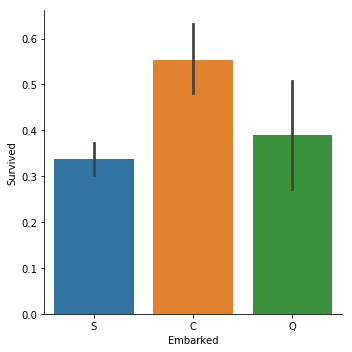

In [106]:
# graphique à générer.

Ceci peut paraitre étrange. Cela s'explique par le fait que les personnes embarquées à Cherbourg étaient majoritairement en première classe. Pour notre traitement nous ne consiérerons donc pas le port d'embarquement.

En lus cela nous arrange car certaines données sont manquantes :-)

## Préparation des données

<div class="alert alert-info"> But : écrire une fonction <i>process_datas</i> qui prend en parametre les données brutes, effectue les traitements nécessaires et retourne les données modifiées</div>

Voici les opérations à effectuer:
- Changement de type de certaines variables
- Ajout de nouvelles variables
- Suppression des varaibles inutiles
- ...

Le but est de ne garder que les données qui slobn vous sont pertinentes.

In [113]:
# repartons avec les données d'origine
training_datas = get_training_titanic_datas()

def process_datas(datas):
    pass

processed_training_datas = process_datas(training_datas)

## Taux de correlation

In [114]:
correlation_matrix = training_datas.corr()
correlation_matrix['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

## Division des données d'entrainement

En vous inspirant du cours, diviser les données d'entraienement en deux : une partie comme témoin et l'autre comme test.

- https://pixees.fr/informatiquelycee/n_site/nsi_prem_projet_titanic.html
- https://www.kaggle.com/competitions/titanic/data?select=test.csv
- https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323
- https://github.com/awesomedata/awesome-public-datasets/issues/351